In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
dataset = pd.read_csv('/Users/akomand/Code/python-ml/linear-regression/ex1data1.txt')

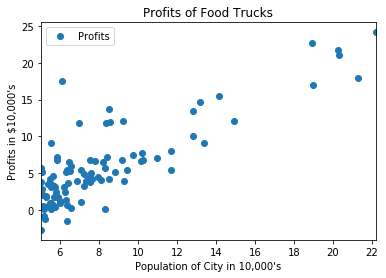

In [5]:
# Matplotlib visualization of data
dataset.plot(x='Population', y='Profits', style='o')  
plt.title('Profits of Food Trucks')  
plt.xlabel('Population of City in 10,000\'s')  
plt.ylabel('Profits in $10,000\'s')  
plt.show()

Text(0.5,1,"Avg Profits in $10,000's")

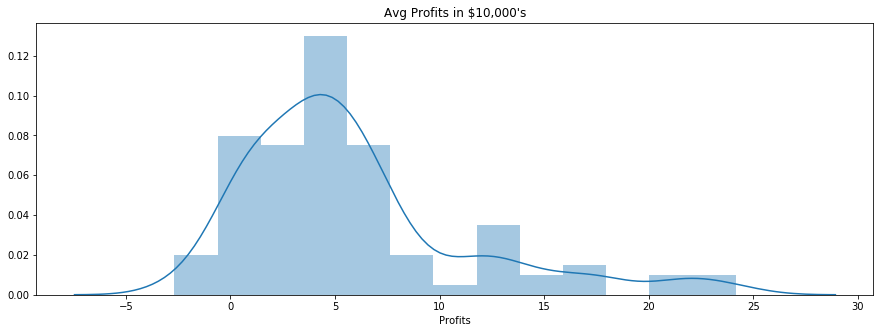

In [6]:
# Plot average profits
plt.figure(figsize=(15,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Profits'])
plt.title('Avg Profits in $10,000\'s')

In [7]:
# Population data into data matrix X and resulting true profits in vector y
X = dataset['Population'].values.reshape(-1,1)
y = dataset['Profits'].values.reshape(-1,1)

In [8]:
# Compute cost function
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    
    predictions = np.matmul(X,theta)
    sqrErrors = np.square(predictions-y)
    
    J = 1.0/(2.0*m) * np.sum(sqrErrors)
    
    return J

In [9]:
# Gradient Descent optimization
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    
    for iter in range(1,num_iters):
        predictions = np.matmul(X,theta)
        err = predictions - y
        
        delta = 1.0 / m * np.matmul(err.transpose(), X)
        theta = theta - (alpha * delta.transpose()) 
        
        J_history[iter] = computeCost(X, y, theta)
        
    return theta

In [10]:
m = len(y)
X_t = np.concatenate((np.ones((m,1)), X), axis=1)
theta = np.zeros((2,1))

J = computeCost(X_t,y,theta)
print('Cost computed with theta [0 ; 0]: ' + str(J))

Cost computed with theta [0 ; 0]: 32.072733877455676


In [11]:
J = computeCost(X_t, y, np.array([[-1],[2]]))
print('Cost computed with theta [-1 ; 2]: ' + str(J))

Cost computed with theta [-1 ; 2]: 54.24245508201238


In [12]:
# Run Gradient Descent
iterations = 1500;
alpha = 0.01;
theta = gradientDescent(X_t,y,theta,alpha,iterations)

In [13]:
# Optimized theta
theta

array([[-3.62981201],
       [ 1.16631419]])

In [14]:
# Predict profits for population sizes of 35,000
pred1 = np.matmul([1,3.5],theta)
print('For population 35,000 we predict: ' + str(pred1 * 10000))

For population 35,000 we predict: [4522.87645807]


In [15]:
# Predict profits for population sizes of 70,000
pred1 = np.matmul(np.array([[1,7]]),theta)
print('For population 35,000 we predict:' + str(pred1 * 10000))

For population 35,000 we predict:[[45343.87296638]]


In [16]:
# Get J-Values to be plotted on surface plot
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(0,len(theta0_vals)):
    for j in range(0,len(theta1_vals)):
        t = np.concatenate((np.array([theta0_vals[i]]), np.array([theta1_vals[j]])))
        J_vals[i][j] = computeCost(X_t,y,t)

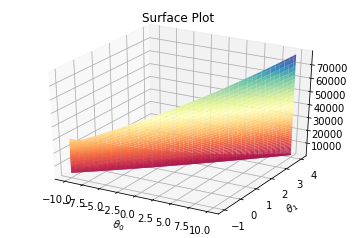

In [24]:
# Surface plot of data
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Surface Plot')
ax.set_xlabel(r'${\theta}_0$')
ax.set_ylabel(r'${\theta}_1$')

surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.transpose(), cmap=cm.Spectral)

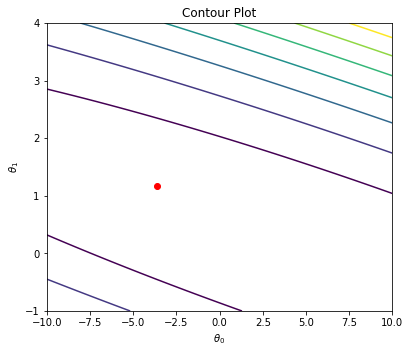

In [18]:
# Contour plot of data
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contour = ax.contour(theta0_vals, theta1_vals, J_vals.transpose())
ax.set_title('Contour Plot')
ax.set_xlabel(r'${\theta}_0$')
ax.set_ylabel(r'${\theta}_1$')
ax.plot(theta[0], theta[1], 'ro')